<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione e su un subset delle prime 500 righe:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta costruendo un modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità? Giustifica la tua risposta valutando le performance del modello o di più modelli

**EXTRA:**
- Estendi il lavoro considerando anche la variabili profondità
- Estendi il lavoro a tutto il dataset
- Estendi il lavoro ad altre variabili che ritieni rilevanti

**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi




### 1. Preparation
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#numero massimo di righe e colonne mostrate
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)


In [3]:
#Lettura
df = pd.read_csv("bottle.csv")

#Subet prime 500 righe
df_500 = df.head(500)

C:\Users\alexg\AppData\Local\Temp\ipykernel_9324\10618348.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bottle.csv")


In [4]:
#Dataset specifico per la richiesta principale del workshop (Considerare solo salinità e temperatura)
df_500_main = df_500[['T_degC', 'Salnty']]

#Dataset specifico per la prima parte extra del workshop (includere la profondità)
df_500_extra1 = df_500[['T_degC', 'Depthm', 'Salnty']]

#Dataset specifico per la seconda parte extra del workshop, si considerano tutte le colonne del dataset
df_500_extra2 = df_500

#Dataset specifico per la terza parte extra del workshop, si considerano solo determinate colonne che hanno un altro grado di correlazione con la salinità, (EDA FIRST)
#df_500_extra3

Link utile: https://calcofi.com/index.php?option=com_content&view=article&id=77:database-tables&catid=73&Itemid=993

---

### 2. EDA (df_500_main)

In [5]:
df_500_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_degC  499 non-null    float64
 1   Salnty  494 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Il primo subset contiene solo valori numerici.

In [6]:
df_500_main.head(5)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [7]:
df_500_main.describe()

,T_degC,Salnty
count,499.000000,494.000000
mean,7.850421,33.628842
std,2.911584,0.560411
min,2.780000,32.630000
25%,5.030000,33.071000
50%,8.180000,33.799500
75%,10.450000,34.130000
max,12.660000,34.450000


Max valore della temperatura: 12.66°
Min valore della temperatura: 2.78°

Max valore della salinità: 34.45
Min valore della salinità: 32.63

---

### 3. Relationships between variables

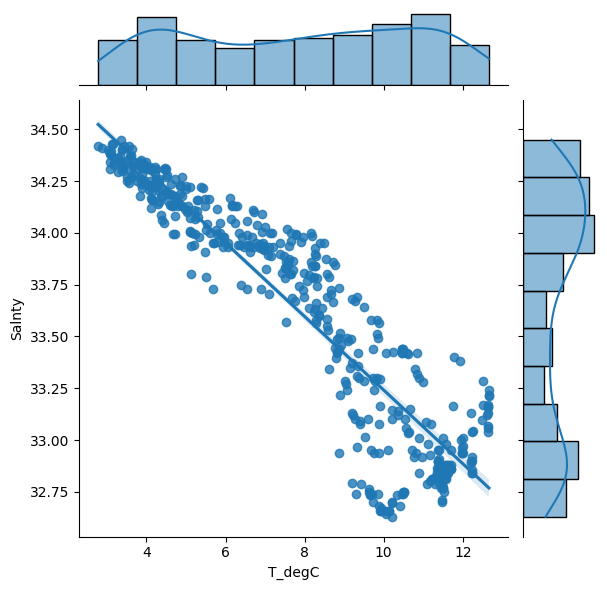

In [8]:
#plot valori non mappati
sns.jointplot(x = 'T_degC', y = 'Salnty', data= df_500_main, kind='reg', palette='viridis')

<AxesSubplot: >

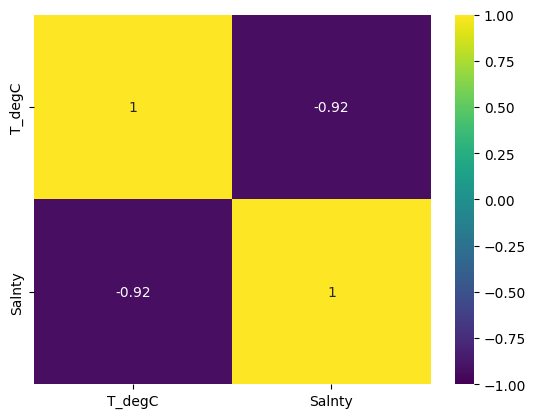

In [9]:
#Analisi correlazione e plottaggio
sns.heatmap(df_500_main.corr(), cmap = "viridis", vmin=-1, annot=True)

Esiste un alto grado di correlazione tra le due tipologie di dati, quindi esiste una forte relazione tra salinità e temperatura del'acqua.

---

### 4. Filtering NaN Values

In [10]:
#Filtering the dataset, there are some NaN values, in this case 6
df_500_main.Salnty.isna().value_counts()

False    494
True       6
Name: Salnty, dtype: int64

In [11]:
df_500_main.T_degC.isna().value_counts()

False    499
True       1
Name: T_degC, dtype: int64

In [12]:
#Filtro il Dataset da tutti i NaN presenti nelle due colonne e salvo tutto in un nuovo Dataset
df_500_main_new = df_500_main[~df_500_main.Salnty.isna()]
df_500_main_new = df_500_main_new[~df_500_main_new.T_degC.isna()]


In [13]:
#Controllo se effettivamente ho quelle righe in meno sommando i NaN contanti precedentemente.
df_500_main_new.shape

(493, 2)

### 5. Splitting Data

In [14]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split

In [15]:
#Temperatura in X
X = df_500_main_new['T_degC']
#Temperatura in Y
Y = df_500_main_new['Salnty']

In [16]:
# Split the data for train and test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=50)

In [17]:
#Converto tutto in Array
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

---

### 5. Linear regression

In [18]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [19]:
# Fitting the model
lr = LinearRegression()

In [20]:
lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
# Predicting the Salnty for the Test values
Y_pred = lr.predict(X_test).flat
Y_test = Y_test.flat 

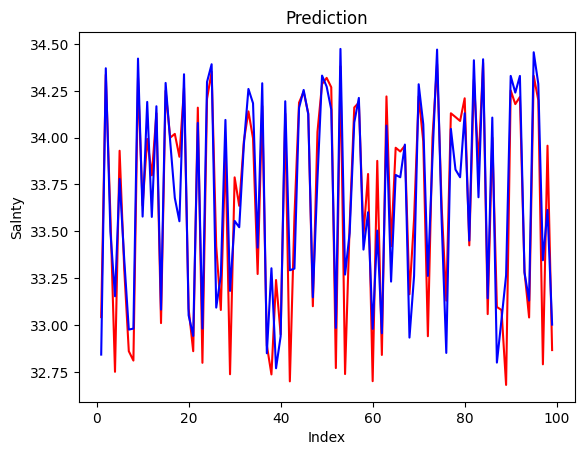

In [22]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,Y_pred,color='b',linestyle='-')
plt.xlabel('Index')
plt.ylabel('Salnty')
plt.title('Prediction')
plt.show()

### CALCOLARE L'ERRORE

In [23]:
# plotting the error
c = [i for i in range(1,len(Y_test)+1,1)]
plt.plot(c,Y_test-Y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

TypeError: unsupported operand type(s) for -: 'numpy.flatiter' and 'numpy.flatiter'

---

### Funzione della retta che meglio descrive la salinità in funzione della temperatura

In [ ]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: [35.03430939]
Coefficient of the line: [[-0.17951986]]


![](http://)Then it is said to form a line with
## y = 35.03430939 - 0.17951986x